In [ ]:
!pip install huggingface_hub --upgrade
!pip install diffusers accelerate transformers safetensors sentencepiece
!pip install clean-fid

In [ ]:
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline
import torch
from huggingface_hub import login
import numpy as np
import os
from PIL import Image
import json
import os.path
from cleanfid import fid

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

We use a Stable Diffusion model from Hugging Face pretrained on the LAION 5B dataset.

In [ ]:
#Initialize Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

EDC 2019 - Las Vegas playlist cover image


  0%|          | 0/50 [00:00<?, ?it/s]

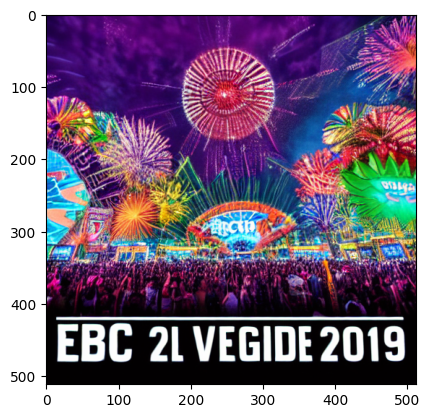

In [ ]:
with open("/content/drive/MyDrive/FinalProject/data/test_set_prompts.json", "r") as file:
  prompts = json.load(file)

dir_name = "/content/drive/MyDrive/FinalProject/data/BaselineOutputs/"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)

images_path = '/content/drive/MyDrive/FinalProject/data/test/'

# List of sample true images
image_names = ['0OmxoVx5pWx8ARiI9rEJML.jpg']
images = []

# Save the true images
for i in range(len(image_names)):
  image = Image.open(images_path + image_names[i])
  images.append(image)
  plt.imshow(image)
  image.save(dir_name + image_names[i])

# Generate and save the output images as well as the prompts
for i in range(len(image_names)):
  image_id = image_names[i][0:22]
  prompt = prompts[image_id]
  print(prompt)
  generated_image = pipe(prompt).images[0]
  plt.imshow(generated_image)
  generated_image.save(dir_name + image_names[i][:-4] + "generated.jpg")

In [ ]:
dir_orig = "/content/drive/MyDrive/FinalProject/Baseline/Original/"
if not os.path.exists(dir_orig):
  os.makedirs(dir_orig)

dir_gen = "/content/drive/MyDrive/FinalProject/Baseline/Generated/"
if not os.path.exists(dir_gen):
  os.makedirs(dir_gen)

# Get a list of all file names in the folder
file_names = os.listdir(images_path)

# Size of the test set
num_test = len(os.listdir(images_path))

# Generate an image using the model for each prompt
for i in range(num_test):
  image = Image.open(images_path + file_names[i])
  image.save(dir_orig + file_names[i])
  image_id = file_names[i][0:22]
  prompt = prompts[image_id]
  generated_image = pipe(prompt).images[0]
  generated_image.save(dir_gen + file_names[i][:-4] + "generated.jpg")

In [ ]:
dir_orig = "/content/drive/MyDrive/FinalProject/data/DFOrig/"
dir_gen = "/content/drive/MyDrive/FinalProject/data/DFGen2/"
score = fid.compute_fid(dir_orig, dir_gen)
print("FID score: " + str(score))

In [ ]:
from google.colab import files
import shutil
shutil.make_archive('/content/sample_data/test', 'zip', '/content/sample_data/test')
files.download("/content/sample_data/test.zip")